# Off-Facebook Activity Analysis Report

## By Serena Gestring

### November 23, 2022

The entire purpose of collecting data is to conduct an analysis and draw conclusions from that analysis in order to make informed decisions for the future. This report is broken into two analyses for two different data sets. Those data sets were visualized in order to conduct the necessary analyses, because having a visual image is more helpful in being able to recognize trends, patterns, etc. that a person might not otherwise find by just looking at the raw data itself. Once analyses were made based on the visualizations, conclusions were documented. 

![](39-Smooth_cover.jpg)

[Image Credit](https://en.wikipedia.org/wiki/File:Green_Day_-_39-Smooth_cover.jpg)

## Part 1: Off-Facebook Data

The first part of this report is looking at off-facebook activity, or data that Facebook collects from businesses and other organizations with which users have interacted/visited. This data is useful for Facebook to provide content they think will be interesting and engaging for users. The purpose of this analysis is to 1) determine what websites/apps are visited the most; 2) see what (if any) inferences we can make from the results; and 3) consider if the drawn conclusions could be inaccurate or incomplete. In essence, the driving question is, "Could Facebook make valid or beneficial decisions based on this data?" 

This is not my personal Facebook data as I do not have a Facebook account; rather, this is my instructor's data. While I cannot make a very informed guess as to what websites and apps might be present in the data, based on what we have talked about in class and the fact my instructor is a Kent State University employee, I am guessing that Spotify, Twitter, and one or more KSU-related websites will be present in the data. 

First, I imported all of the packages necessary for collecting, wrangling, and visualizing data. Then I loaded in the data file that I am looking to analyze for this first part of the report. 

In [1]:
import pandas as pd
import json
import requests
import base64
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np

In [2]:
with open(r'C:\Users\Serena\EMAT22110_FA22\facebook-davidsilva100046_year-toshare\facebook-davidsilva100046_year-to_share\apps_and_websites_off_of_facebook\your_off-facebook_activity.json') as o:
    ofa_data = json.load(o)

I loaded that data into an initial data frame. Then I used the len() function to count the number of items in the 'events' list so that that information could be added to the data frame in a more readable way. Then I used the groupby() and count() methods in order to show how many logged counts each individual website/app had (rather than each count being its own row like in the initial data frame). 

In [3]:
ofa_data_df = pd.DataFrame(ofa_data['off_facebook_activity_v2'])
events = [len(x) for x in ofa_data_df['events']]
final_ofa_df = ofa_data_df.groupby(['name']).count()
final_ofa_df['events'] = events

Finally, I sorted the dataframe to list the names in order from the most counts to least counts. The top 20 are listed below. 

In [4]:
final_ofa_df.sort_values('events', ascending=False).head(20)

,events
name,
Oracle Corporate,838
500px.com,631
honda.com,125
Spotify: Spotify: Music and Podcasts,118
AirDroid: Remote access & File,84
gapfactory.com,53
Allstate,51
knowyourmeme.com,46
hondafinancialservices.com,40


![](Insomniac.jpg)

[Image Credit](https://en.wikipedia.org/wiki/File:Green_Day_Insomiac.jpg)

From this data, I created a histogram that visualizes the frequency of the logged counts (meaning how many websites/apps had counts that were in a specified value range). The histogram below includes all of the data in the data frame. However, because the values "838" and "631" are far removed from where the rest of the data is, the graph below does not provide much detail. Trying to add more bins did not help the visualization. I decided to keep this graph to show the complete data even though it is not very helpful because I did not want it to look like I was trying to manipulate the data results. The next graphs are simply an attempt to get a closer and more detailed look at the data. 

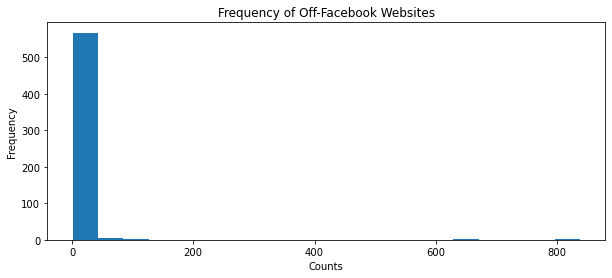

In [5]:
fig1, ax1 = plt.subplots()
fig1.set_figwidth(10)
ax1.hist(final_ofa_df['events'], bins = 20)
ax1.set_xlabel('Counts')
ax1.set_ylabel('Frequency')
ax1.set_title('Frequency of Off-Facebook Websites')
plt.show()

The three graphs below are basically "zoomed in" visualizations of the counts data. The first graph shows the logged counts with a frequency less than 200, but again that visualization is still not very helpful. The second graph shows the logged counts with a frequency less than 70, and it is starting to get more detailed but I wanted to look even closer. The third graph shows the logged counts with a frequency less than 20. The first two graphs tell me that most of the counts are less than 20, but the third graph gives me a better picture of that breakdown so that I can see that the majority of those counts are actually 1 or 2. I would not have learned that from any of the other graphs.  

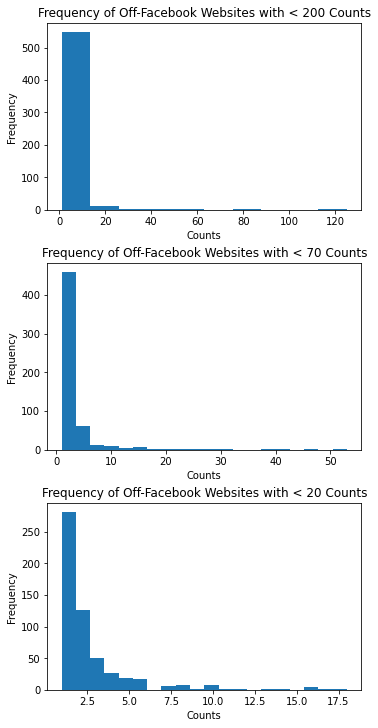

In [9]:
fig1, ax1 = plt.subplots(3, 1, layout = 'constrained')
fig1.set_figwidth(5)
fig1.set_figheight(10)
ax1[0].set_xlabel('Counts')
ax1[0].set_ylabel('Frequency')
ax1[0].set_title('Frequency of Off-Facebook Websites with < 200 Counts')
ax1[0].hist(final_ofa_df[final_ofa_df['events'] < 200]['events'], bins = 10)
ax1[1].set_xlabel('Counts')
ax1[1].set_ylabel('Frequency')
ax1[1].set_title('Frequency of Off-Facebook Websites with < 70 Counts')
ax1[1].hist(final_ofa_df[final_ofa_df['events'] < 70]['events'], bins = 20)
ax1[2].set_xlabel('Counts')
ax1[2].set_ylabel('Frequency')
ax1[2].set_title('Frequency of Off-Facebook Websites with < 20 Counts')
ax1[2].hist(final_ofa_df[final_ofa_df['events'] < 20]['events'], bins = 20)
plt.show()

The histograms show that while there are a few websites/apps that had logged count values above 60, the majority of counts had a frequency less than 20, with many of those websites/apps only having logged counts of 1 or 2. This suggests that only a couple of websites/app are prominent/important in my instructor's digital activity, while some are not as prominent and most are not very important.

![](Nimrod.jpg)

[Image Credit](https://en.wikipedia.org/wiki/File:Green_Day_-_Nimrod_cover.jpg)

The next step in analyzing this data is to see which specific websites/apps are being logged the most. To do this, I created a bar graph visualizing the top 20 most logged websites/apps and their counts. I tried to stretch the graph out as far as I could to make the labels readable, but I could only go so far. 

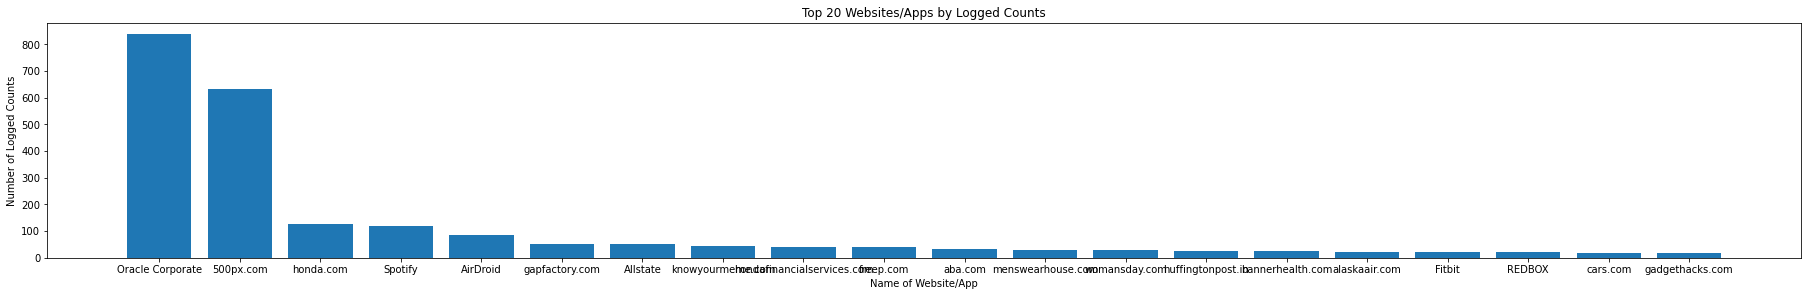

In [10]:
fig2, ax2 = plt.subplots(layout = 'constrained')
fig2.set_figwidth(25)
ax2.set_title('Top 20 Websites/Apps by Logged Counts')
ax2.set_xlabel('Name of Website/App')
ax2.set_ylabel('Number of Logged Counts')
names = ['Oracle Corporate', '500px.com', 'honda.com', 'Spotify', 'AirDroid', 'gapfactory.com', 'Allstate', 'knowyourmeme.com', 'hondafinancialservices.com', 'freep.com', 'aba.com', 'menswearhouse.com', 'womansday.com', 'huffingtonpost.in', 'bannerhealth.com', 'alaskaair.com', 'Fitbit', 'REDBOX', 'cars.com', 'gadgethacks.com']
counts = [838, 631, 125, 118, 84, 53, 51, 46, 40, 39, 32, 29, 29, 26, 24, 22, 22, 21, 18, 17]
ax2.bar(names, counts)
plt.show()

The bar plot specifically shows which websites/apps have the highest logged counts. This visualization shows that Oracle Corporate is probably the most important websites in my instructor's digital activity since it has the highest counts, and this would make sense due to since his job is working with data. 500px.com is the website with the second highest counts, which would suggest that website it also quite important, but I do not know my instructor well enough to guess why.  

Facebook itself could make a few different conclusions based on this data. First, they could infer that this user is heavily interested in data-related content and photography-related content, and therefore should provide similar content to those top websites to possibly prompt more engagement. Facebook could also try to provide more content from some of the less prominent websites/apps because the user showed at least minimal interest in those to have logged in at least once, so perhaps he could be influenced to visit again. 

This conclusion may or may not be accurate, firstly because my understanding is that this data was given to Facebook by these companies (e.g. Oracle Corporate told Facebook this user logged in to their website 838 times). Therefore, it is possible that some or even many of the websites/apps that my instructor utilizes does not have a contract/agreement to share that information with Facebook, meaning this data is incomplete, and therefore not necessarily reliable because the full picture may not be being provided in the visualizations above. With that being said, the strategies given in the previous paragraph could still be implemented with the specific websites/apps that are provided in the data. If Facebook finds their efforts are not proving to be fruitful, then a next step (though this would obviously be a major and possibly lengthy step only justified if they are having this same issue with multiple users) would be to create agreements with more businesses and organizations to collect their users' data so that a better picture can be created for each user.   

![](Warning.jpg)

[Image Credit](https://en.wikipedia.org/wiki/File:Green_Day_-_Warning_cover.jpg)

## Part 2: Spotify Data

The second part of this report is looking at two different albums and comparing their audio features. Comparing audio features of different albums/artists/genres can be used to answer a wide variety of questions. For this specific report, I am looking at Green Day's 2004 album "American Idiot" and their 2009 album "21st Century Breakdown." Both of these albums are considered rock operas ("American Idiot" was even adapted into a musical), and since these were released one right after another, I thought it would be interesting to compare the two and see how similar or different they are. Therefore the driving question is, "How do the consecutive rock operas 'American Idiot' and '21st Century Breakdown' compare to each other and does that say anything about Green Day's musical/artistic ability?"

I have been listening to Green Day my entire life, and while many songs from across their discography have deeply resonated with me, these two albums hold a special place in my heart, in part because of their stories and also because of the music itself. I will be the first to admit a lot of Green Day's songs have a similar sound, but I think these albums are pretty unique. I have been listening to them for so long that now every time I do it feels like coming home.

I collected data on these two albums through Spotify. First, I had to upload my Spotify Keys that grant me access to the Spotify API. 

In [11]:
keys = pd.read_csv("Spotify_Keys_10-18-22.txt", header = 0, sep = ",")
appid = keys['Client_ID'][0]
appsecret = keys['Client_Secret'][0]

In [12]:
client_cred = base64.b64encode(str(appid + ":" + appsecret).encode('ascii'))
header = {'Authorization': 'Basic {}'.format(client_cred.decode('ascii'))}
payload = {'grant_type' : 'client_credentials'}
access_token_url = "https://accounts.spotify.com/api/token"

In [13]:
response = requests.post(access_token_url, headers = header, data = payload)
session_token = response.json()['access_token']
session_header = {'Authorization': 'Bearer {}'.format(response.json()['access_token'])}

Once I had proven my authorization, I used the Album Tracks Endpoint in order to retrieve the track data from the "American Idiot" album (abbreviated as "ai"). I printed the status code to know that this worked correctly. 

In [14]:
ai_id = '5dN7F9DV0Qg1XRdIgW8rke'
album_tracks_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(ai_id)
ai_tracks = requests.get(album_tracks_endpoint, headers = session_header)
print(ai_tracks.status_code)

200


Then I created a string of the track ids. I accessed the Track Features Endpoint using that string of ids to get the audio features for the tracks on the "American Idiot" album. I printed the status code to know this worked correctly as well. 

In [15]:
ai_dict = json.loads(ai_tracks.text)
ai_track_ids = [x['id'] for x in ai_dict['items']]
ai_track_strings = ','.join(str(x) for x in ai_track_ids)
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(ai_track_strings)
ai_features = requests.get(track_features_endpoint, headers = session_header)
print(ai_features.status_code)

200


I created a data frame for the audio features of "American Idiot." 

In [16]:
aif_dict = json.loads(ai_features.text)
ai_df = pd.DataFrame(aif_dict['audio_features'])

![](American_Idiot.png)

[Image Credit](https://en.wikipedia.org/wiki/File:Green_Day_-_American_Idiot_album_cover.png)

Then I repeated those exact steps with the "21st Century Breakdown" album (abbreviated as "cb"). 

In [17]:
cb_id = '1AHZd3C3S8m8fFrhFxyk79'
album_tracks_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(cb_id)
cb_tracks = requests.get(album_tracks_endpoint, headers = session_header)
print(cb_tracks.status_code)

200


In [18]:
cb_dict = json.loads(cb_tracks.text)
cb_track_ids = [x['id'] for x in cb_dict['items']]
cb_track_strings = ','.join(str(x) for x in cb_track_ids)
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(cb_track_strings)
cb_features = requests.get(track_features_endpoint, headers = session_header)
print(cb_features.status_code)

200


In [19]:
cbf_dict = json.loads(cb_features.text)
cb_df = pd.DataFrame(cbf_dict['audio_features'])

Now that I have a data frame of the audio features for both "American Idiot" and "21st Century Breakdown," I joined those data frames together using the concat() method. The first five items in the data frame and the last five items are provided below.

In [20]:
ai_df['album'] = ['american_idiot'] * len(ai_df.index)
cb_df['album'] = ['century_breakdown'] * len(cb_df.index)
audio_features = pd.concat([ai_df, cb_df])

In [21]:
audio_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,album
0,0.380,0.988,1,-2.042,1,0.0639,0.000026,0.000079,0.3680,0.769,186.113,audio_features,6nTiIhLmQ3FWhvrGafw2zj,spotify:track:6nTiIhLmQ3FWhvrGafw2zj,https://api.spotify.com/v1/tracks/6nTiIhLmQ3FW...,https://api.spotify.com/v1/audio-analysis/6nTi...,176346,4,american_idiot
1,0.300,0.929,1,-3.214,1,0.0636,0.000259,0.000002,0.3290,0.590,147.116,audio_features,58KPPL1AdLHMvR2O2PZejr,spotify:track:58KPPL1AdLHMvR2O2PZejr,https://api.spotify.com/v1/tracks/58KPPL1AdLHM...,https://api.spotify.com/v1/audio-analysis/58KP...,548253,4,american_idiot
2,0.290,0.827,8,-3.451,1,0.0362,0.000659,0.000003,0.3010,0.450,167.086,audio_features,0MsrWnxQZxPAcov7c74sSo,spotify:track:0MsrWnxQZxPAcov7c74sSo,https://api.spotify.com/v1/tracks/0MsrWnxQZxPA...,https://api.spotify.com/v1/audio-analysis/0Msr...,493400,4,american_idiot
3,0.276,0.909,9,-3.664,1,0.0618,0.000160,0.000005,0.0933,0.344,138.497,audio_features,5MqV2o7iLd0lNREZ7SYL05,spotify:track:5MqV2o7iLd0lNREZ7SYL05,https://api.spotify.com/v1/tracks/5MqV2o7iLd0l...,https://api.spotify.com/v1/audio-analysis/5MqV...,338147,4,american_idiot
4,0.312,0.949,9,-3.533,1,0.0784,0.001850,0.000018,0.0569,0.650,154.795,audio_features,11I3KKHv7g2pXiuqRDabRA,spotify:track:11I3KKHv7g2pXiuqRDabRA,https://api.spotify.com/v1/tracks/11I3KKHv7g2p...,https://api.spotify.com/v1/audio-analysis/11I3...,326200,4,american_idiot


In [22]:
audio_features.tail()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,album
13,0.456,0.993,9,-2.471,1,0.0594,0.000066,0.000601,0.297,0.684,142.966,audio_features,3Dl2gul5pJ5Ceh7ew5kvC9,spotify:track:3Dl2gul5pJ5Ceh7ew5kvC9,https://api.spotify.com/v1/tracks/3Dl2gul5pJ5C...,https://api.spotify.com/v1/audio-analysis/3Dl2...,194067,4,century_breakdown
14,0.471,0.964,2,-3.293,1,0.0467,0.000179,0.000000,0.541,0.847,156.014,audio_features,0c0ptxjRaqaxMM8gvSWCG0,spotify:track:0c0ptxjRaqaxMM8gvSWCG0,https://api.spotify.com/v1/tracks/0c0ptxjRaqax...,https://api.spotify.com/v1/audio-analysis/0c0p...,256627,4,century_breakdown
15,0.268,0.742,5,-4.939,1,0.0355,0.051800,0.000000,0.626,0.416,159.779,audio_features,64yrDBpcdwEdNY9loyEGbX,spotify:track:64yrDBpcdwEdNY9loyEGbX,https://api.spotify.com/v1/tracks/64yrDBpcdwEd...,https://api.spotify.com/v1/audio-analysis/64yr...,321093,4,century_breakdown
16,0.256,0.955,2,-3.605,1,0.1450,0.010800,0.000000,0.565,0.660,176.941,audio_features,2DSgsIY3ZCjx7DhMNRzsSS,spotify:track:2DSgsIY3ZCjx7DhMNRzsSS,https://api.spotify.com/v1/tracks/2DSgsIY3ZCjx...,https://api.spotify.com/v1/audio-analysis/2DSg...,266107,4,century_breakdown
17,0.305,0.961,1,-4.107,1,0.0498,0.000115,0.000015,0.210,0.367,140.287,audio_features,5bUXuNEIxQbX6sTiP43z5H,spotify:track:5bUXuNEIxQbX6sTiP43z5H,https://api.spotify.com/v1/tracks/5bUXuNEIxQbX...,https://api.spotify.com/v1/audio-analysis/5bUX...,275933,4,century_breakdown


![](Century_Breakdown.jpg)

[Image Credit](https://en.wikipedia.org/wiki/File:Green_Day_-_21st_Century_Breakdown_cover.jpg) 

I chose to analyze each albums' energy ratings (measure of intensity and activity, such as fast/loud/noisy) and valence ratings (musical positiveness, such as happy/cheerful or depressed/angry). To me, both of these albums are exciting and energetic for the most part, but also deal with some heavy topics, so I wanted to see how those two features compared to each other and between albums. 

First I created two histograms. The first compares the energy ratings between the albums, and the second compares the valence ratings between the albums. 

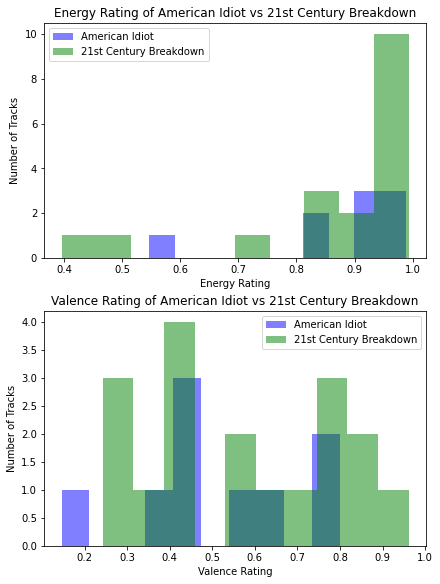

In [23]:
fig1, ax1 = plt.subplots(2, 1, layout = 'constrained')
fig1.set_figheight(8)
ai_e = audio_features[audio_features['album'] == 'american_idiot']['energy']
cb_e = audio_features[audio_features['album'] == 'century_breakdown']['energy']
ai_v = audio_features[audio_features['album'] == 'american_idiot']['valence']
cb_v = audio_features[audio_features['album'] == 'century_breakdown']['valence']
ax1[0].hist(ai_e, alpha = 0.5, color = 'blue', label = 'American Idiot')
ax1[0].hist(cb_e, alpha = 0.5, color = 'green', label = '21st Century Breakdown')
ax1[0].legend()
ax1[0].set_xlabel('Energy Rating')
ax1[0].set_ylabel('Number of Tracks')
ax1[0].set_title('Energy Rating of American Idiot vs 21st Century Breakdown')
ax1[1].hist(ai_v, alpha = 0.5, color = 'blue', label = 'American Idiot')
ax1[1].hist(cb_v, alpha = 0.5, color = 'green', label = '21st Century Breakdown')
ax1[1].legend()
ax1[1].set_xlabel('Valence Rating')
ax1[1].set_ylabel('Number of Tracks')
ax1[1].set_title('Valence Rating of American Idiot vs 21st Century Breakdown')
plt.show()

The first histogram shows that the majority of songs on both albums have a really high energy, which did not surprise me, and "American Idiot" has one song of a lower energy compared to the rest on that album, while "21st Century Breakdown" has two songs of a much lower energy compared to the rest on that album. Again, I think this makes sense for the genre of music these albums fit under.  

The second histogram also has a lot of overlap and there is a decent spread for both. Both albums peak around the 0.45 valence rating, meaning more songs are kind of sad/angry, with a few that are lower and with some that are happier. "21st Century Breakdown" does seem to have more songs that have a higher valence rating (above 0.8), meaning more songs have happier content, and "American Idiot" has one song with the lowest valence rating of all at just less than 0.2, meaning that song is particularly depressing. 

Overall it looks like these albums' energy and valence are pretty similar, which could have to do with their punk rock music genre or also the fact that both story lines are more or less about the same topics (American politics, particularly in regard to George W. Bush's presidency). 

![](Uno.jpg)

[Image Credit](https://en.wikipedia.org/wiki/File:Green_Day_-_Uno!_cover.jpg)

Next I looked at the relationships between energy and valence for "American Idiot" and "21st Century Breakdown" separately and then together, for a total of three scatter plots. 

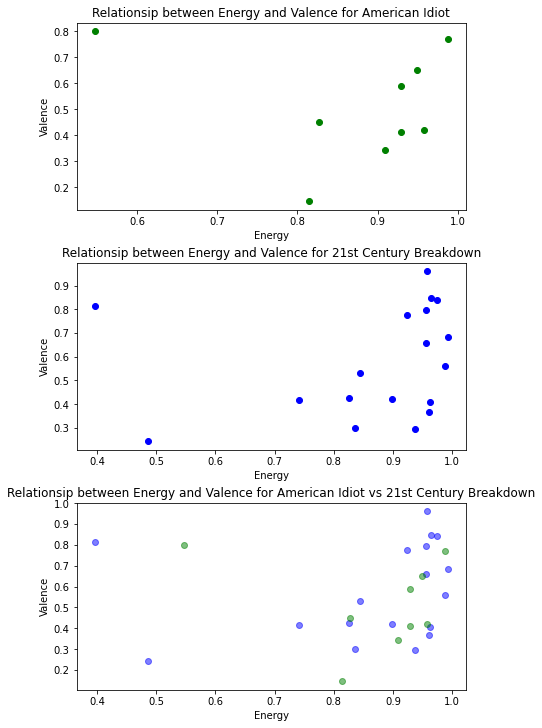

In [24]:
fig1, ax1 = plt.subplots(3, 1, layout = 'constrained')
fig1.set_figheight(10)
ai_data = audio_features[audio_features['album'] == 'american_idiot']
ax1[0].scatter(ai_data['energy'], ai_data['valence'], color = 'green')
ax1[0].set_xlabel('Energy')
ax1[0].set_ylabel('Valence')
ax1[0].set_title('Relationsip between Energy and Valence for American Idiot')
cb_data = audio_features[audio_features['album'] == 'century_breakdown']
ax1[1].scatter(cb_data['energy'], cb_data['valence'], color = 'blue')
ax1[1].set_xlabel('Energy')
ax1[1].set_ylabel('Valence')
ax1[1].set_title('Relationsip between Energy and Valence for 21st Century Breakdown')
ax1[2].scatter(cb_data['energy'], cb_data['valence'], color = 'blue', alpha = 0.5)
ax1[2].scatter(ai_data['energy'], ai_data['valence'], color = 'green', alpha = 0.5)
ax1[2].set_xlabel('Energy')
ax1[2].set_ylabel('Valence')
ax1[2].set_title('Relationsip between Energy and Valence for American Idiot vs 21st Century Breakdown')
plt.show()

The first two scatter plots both show that the energy tends to be higher while there is a wide range in valence, which is true for both albums. The similarities are even more evident when looking at the third scatter plot. There are only a few outliers. This confirms the similarities that were gleaned from the histograms. 

Finally, I created a boxplot to analyze and compare the danceability between albums (how "danceable" the tracks are). I personally do not dance very much, so I thought it would be interesting to see how two of my favorite albums from one of my favorite bands ranked in terms of danceability. Then I tested for statistical differences using the ttest_ind() function.

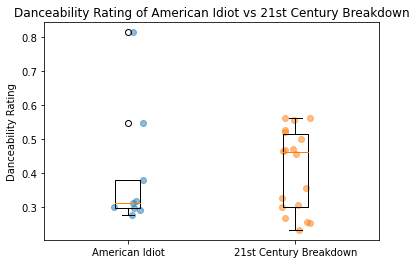

In [25]:
fig1, ax1 = plt.subplots()
ai_dance = audio_features[audio_features['album'] == 'american_idiot']['danceability']
cb_dance = audio_features[audio_features['album'] == 'century_breakdown']['danceability']
ai_x = [1] * len(ai_dance)
cb_x = [2] * len(cb_dance)
ai_x_jitter = np.random.uniform(-0.10, 0.10, len(ai_x))
cb_x_jitter = np.random.uniform(-0.10, 0.10, len(cb_x))
ax1.scatter(ai_x + ai_x_jitter, ai_dance, alpha = 0.5)
ax1.scatter(cb_x + cb_x_jitter, cb_dance, alpha = 0.5)
ax1.boxplot([ai_dance, cb_dance])
ax1.set_xticks([1,2], ['American Idiot', '21st Century Breakdown'])
ax1.set_ylabel('Danceability Rating')
ax1.set_title('Danceability Rating of American Idiot vs 21st Century Breakdown')
plt.show()

In [26]:
ai_dance = audio_features[audio_features['album'] == 'american_idiot']['danceability']
cb_dance = audio_features[audio_features['album'] == 'century_breakdown']['danceability']
stats.ttest_ind(ai_dance, cb_dance)

Ttest_indResult(statistic=-0.3030170405793504, pvalue=0.7643840373730302)

The boxplot shows that "American Idiot" is generally not very danceable, most songs rating around 0.3-0.4, with two exceptions of a moderately danceable song near 0.55 and a very danceable song just above 0.8. "21 Century Breakdown" does not have any outliers like "American Idiot," with all of its songs ranging from below 0.3 to just under 0.6, meaning this album overall has moderate-to-low danceability.  

The t-statistic is approximately -0.3, which is close to 0, and therefore means there is likely not a significant difference between the two albums' danceability. The p-value is approximately 0.76, which is greater than 0.05 and therefore means that the result is insignificant. 

![](RevRad.jpg)

[Image Credit](https://en.wikipedia.org/wiki/File:GreenDayRevRad.jpg)

In terms of quality of the data, it was pulled directly from Spotify, so with the exception of any mistakes made by Spotify, this data should be reliable and complete. Based on just the energy, valence, and danceability, it appears these two rock operas are quite similar. A next step would be to compare every audio feature of both albums in order to make a more concrete conclusion as to whether Green Day made the same album twice (which would not lesson my own opinion of them as a band because even if the albums are actually very similar, they are both still really good and important to me). I think another next step would be to perform this analysis with all of Green Day's albums to see how Green Day as a band has evolved over their career as artists and musicians. This analysis would be enlightening and also meaningful to me personally as a fan, but also to probably many others since Green Day makes the list of [Best-Selling Music Artists](https://en.wikipedia.org/wiki/List_of_best-selling_music_artists#75_million_to_79_million_records) (they are near the bottom, but they still made the list and that is what matters), so they are definitely a prominent band deserving of attention. 